# Linear Models and Gradient Descent
## AIM 460 - Artificial Intelligence and Machine Learning

---

## Table of Contents
1. [Introduction to Linear Models](#introduction)
2. [Simple Linear Regression](#simple-linear-regression)
3. [Multiple Linear Regression](#multiple-linear-regression)
4. [Understanding Gradient Descent](#gradient-descent)
5. [Implementing Gradient Descent from Scratch](#gradient-descent-implementation)
6. [Logistic Regression](#logistic-regression)
7. [Regularization Techniques](#regularization)
8. [Real-World Applications](#applications)

---

## 1. Introduction to Linear Models

Linear models are the foundation of machine learning. They assume a **linear relationship** between input features and the target variable. Think of them as finding the "best fit line" through your data points.

### Why Linear Models Matter:
- **Interpretable**: You can easily understand what each feature contributes
- **Fast**: Quick to train and make predictions
- **Baseline**: Great starting point before trying complex models
- **Real-world applicable**: Many business problems have linear relationships

### Mathematical Foundation:
For a linear model with n features, the prediction is:

**ŷ = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ**

Where:
- **ŷ** = predicted value
- **β₀** = intercept (y-value when all x's are 0)
- **β₁, β₂, ..., βₙ** = coefficients (how much each feature affects the prediction)
- **x₁, x₂, ..., xₙ** = feature values

---

In [5]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Simple Linear Regression

Let's start with the simplest case: predicting one variable from another. Imagine you're trying to predict house prices based on square footage.

### The Goal:
Find the best line that goes through our data points, minimizing the **prediction errors**.


In [8]:
# Generate synthetic data for simple linear regression
def generate_simple_data(n_samples=100, noise=0.3):
    """
    Generate simple linear data with controllable noise
    This simulates house prices based on square footage
    """
    # Square footage (in thousands)
    X = np.random.uniform(1, 4, n_samples)  # 1000-4000 sq ft
    
    # Price = 50k * sqft + 100k base + noise
    y = 50 * X + 100 + np.random.normal(0, noise * 20, n_samples)
    
    return X.reshape(-1, 1), y

# Create our dataset
X_simple, y_simple = generate_simple_data(100, 0.3)

# Let's look at our data
print(f"We have {len(X_simple)} data points")
print(f"Square footage range: {X_simple.min():.1f}k - {X_simple.max():.1f}k sq ft")
print(f"Price range: ${y_simple.min():.0f}k - ${y_simple.max():.0f}k")

We have 100 data points
Square footage range: 1.0k - 4.0k sq ft
Price range: $151k - $303k


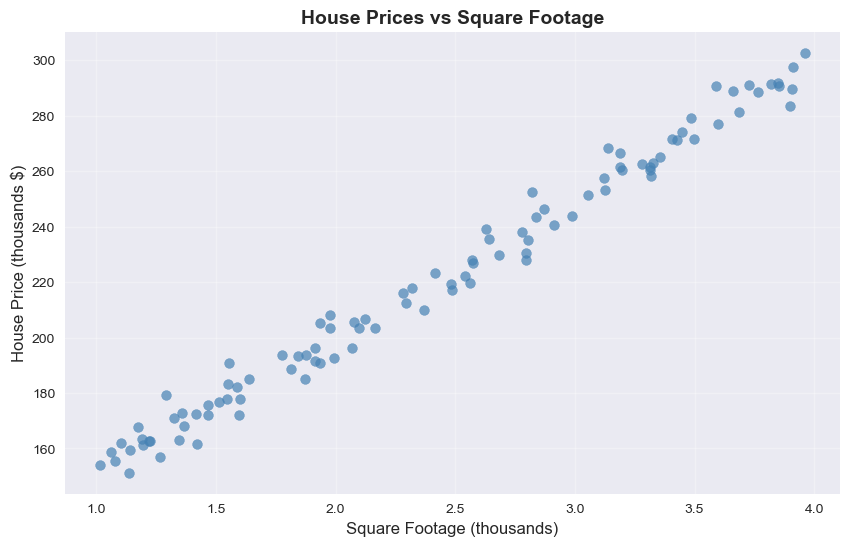

Question: What pattern do you see in the data?
Answer: There's a positive linear relationship - bigger houses cost more!


In [10]:
# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.7, color='steelblue', s=50)
plt.xlabel('Square Footage (thousands)', fontsize=12)
plt.ylabel('House Price (thousands $)', fontsize=12)
plt.title('House Prices vs Square Footage', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# What do you notice about the relationship?
print("Question: What pattern do you see in the data?")
print("Answer: There's a positive linear relationship - bigger houses cost more!")

In [12]:
# Fit our linear regression model
simple_model = LinearRegression()
simple_model.fit(X_simple, y_simple)

# Make predictions
y_pred_simple = simple_model.predict(X_simple)

print("Model Training Complete!")
print(f"Intercept (β₀): ${simple_model.intercept_:.1f}k")
print(f"Coefficient (β₁): ${simple_model.coef_[0]:.1f}k per thousand sq ft")
print(f"R² Score: {r2_score(y_simple, y_pred_simple):.3f}")

Model Training Complete!
Intercept (β₀): $102.2k
Coefficient (β₁): $49.1k per thousand sq ft
R² Score: 0.985


### Understanding the Results:

- **Intercept (β₀)**: The base price when square footage = 0 (theoretical baseline)
- **Coefficient (β₁)**: How much the price increases per 1,000 sq ft
- **R² Score**: How much of the price variation our model explains (0-1, higher is better)


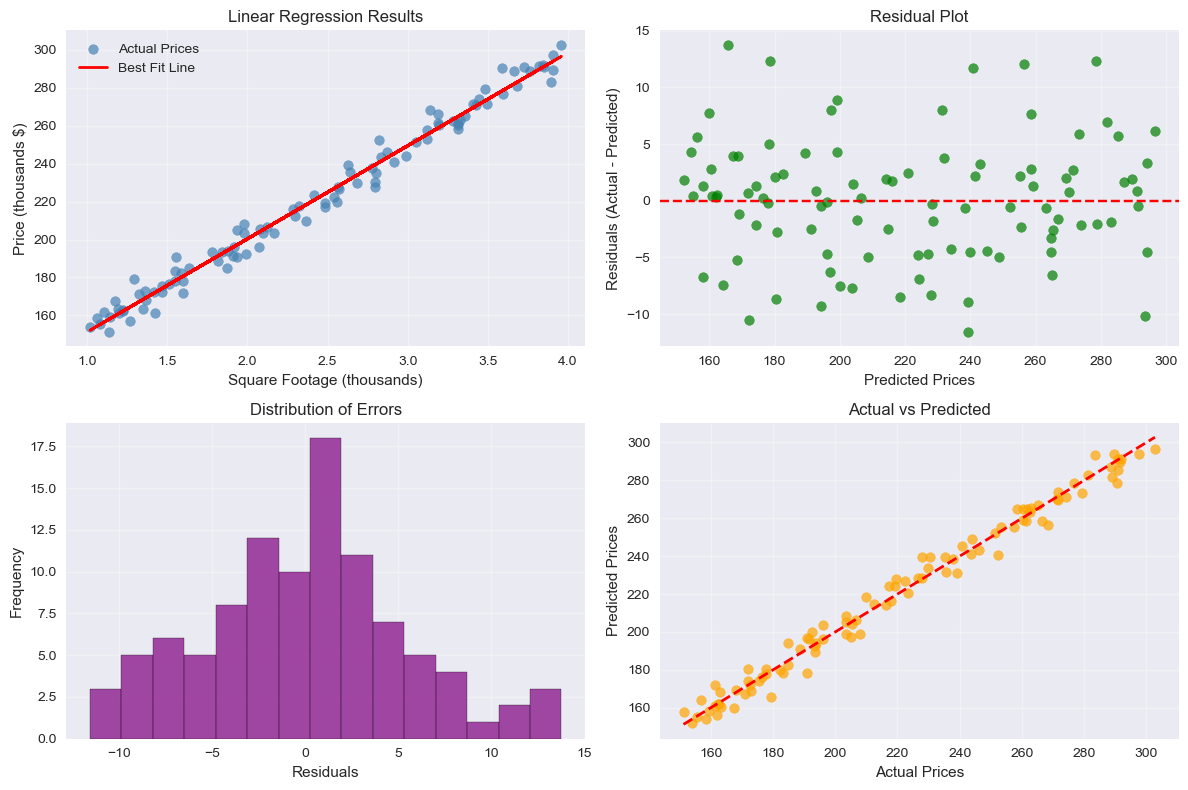

In [15]:
# Visualize the results
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(2, 2, 1)
plt.scatter(X_simple, y_simple, alpha=0.7, color='steelblue', label='Actual Prices')
plt.plot(X_simple, y_pred_simple, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Square Footage (thousands)')
plt.ylabel('Price (thousands $)')
plt.title('Linear Regression Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals (errors)
residuals = y_simple - y_pred_simple
plt.subplot(2, 2, 2)
plt.scatter(y_pred_simple, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Distribution of residuals
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=15, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.grid(True, alpha=0.3)

# Actual vs Predicted
plt.subplot(2, 2, 4)
plt.scatter(y_simple, y_pred_simple, alpha=0.7, color='orange')
plt.plot([y_simple.min(), y_simple.max()], [y_simple.min(), y_simple.max()], 'r--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Multiple Linear Regression

Real-world problems usually involve multiple features. Let's predict house prices using several factors.

### The Challenge:
Instead of a line in 2D, we're finding a **hyperplane** in multi-dimensional space that best fits our data.


In [18]:
def create_housing_data(n_samples=500):
    """
    Create realistic synthetic housing data with multiple features
    """
    np.random.seed(42)
    
    # Generate realistic features
    sqft = np.random.normal(2000, 500, n_samples)  # Square footage
    bedrooms = np.random.poisson(3, n_samples) + 1  # Number of bedrooms
    age = np.random.uniform(0, 50, n_samples)  # Age in years
    distance_city = np.random.exponential(10, n_samples)  # Miles from city center
    crime_rate = np.random.exponential(5, n_samples)  # Crime incidents per 1000 people
    
    # Create realistic price relationships
    price = (
        0.1 * sqft +           # $100 per sq ft
        10 * bedrooms +        # $10k per bedroom
        -2 * age +             # -$2k per year of age
        -3 * distance_city +   # -$3k per mile from city
        -5 * crime_rate +      # -$5k per crime incident
        50 +                   # Base price $50k
        np.random.normal(0, 20, n_samples)  # Random noise
    )
    
    # Ensure positive prices and reasonable ranges
    price = np.maximum(price, 50)
    sqft = np.maximum(sqft, 800)
    
    return pd.DataFrame({
        'sqft': sqft,
        'bedrooms': bedrooms,
        'age': age,
        'distance_city': distance_city,
        'crime_rate': crime_rate,
        'price': price
    })

# Create our multi-feature dataset
housing_data = create_housing_data(500)

print("Multi-feature Housing Dataset Created!")
print(f"Dataset shape: {housing_data.shape}")
print("\nFirst few rows:")
print(housing_data.head())

Multi-feature Housing Dataset Created!
Dataset shape: (500, 6)

First few rows:
          sqft  bedrooms        age  distance_city  crime_rate       price
0  2248.357077         6  10.444136       9.949207    7.336414  229.092265
1  1930.867849         2  18.435359       2.855292    2.536374  232.077178
2  2323.844269         2  18.490663      12.223433    8.788328  208.195136
3  2761.514928         3   2.617751       5.579196    0.935917  332.184749
4  1882.923313         3  38.378381       5.843744    0.154687  174.822859


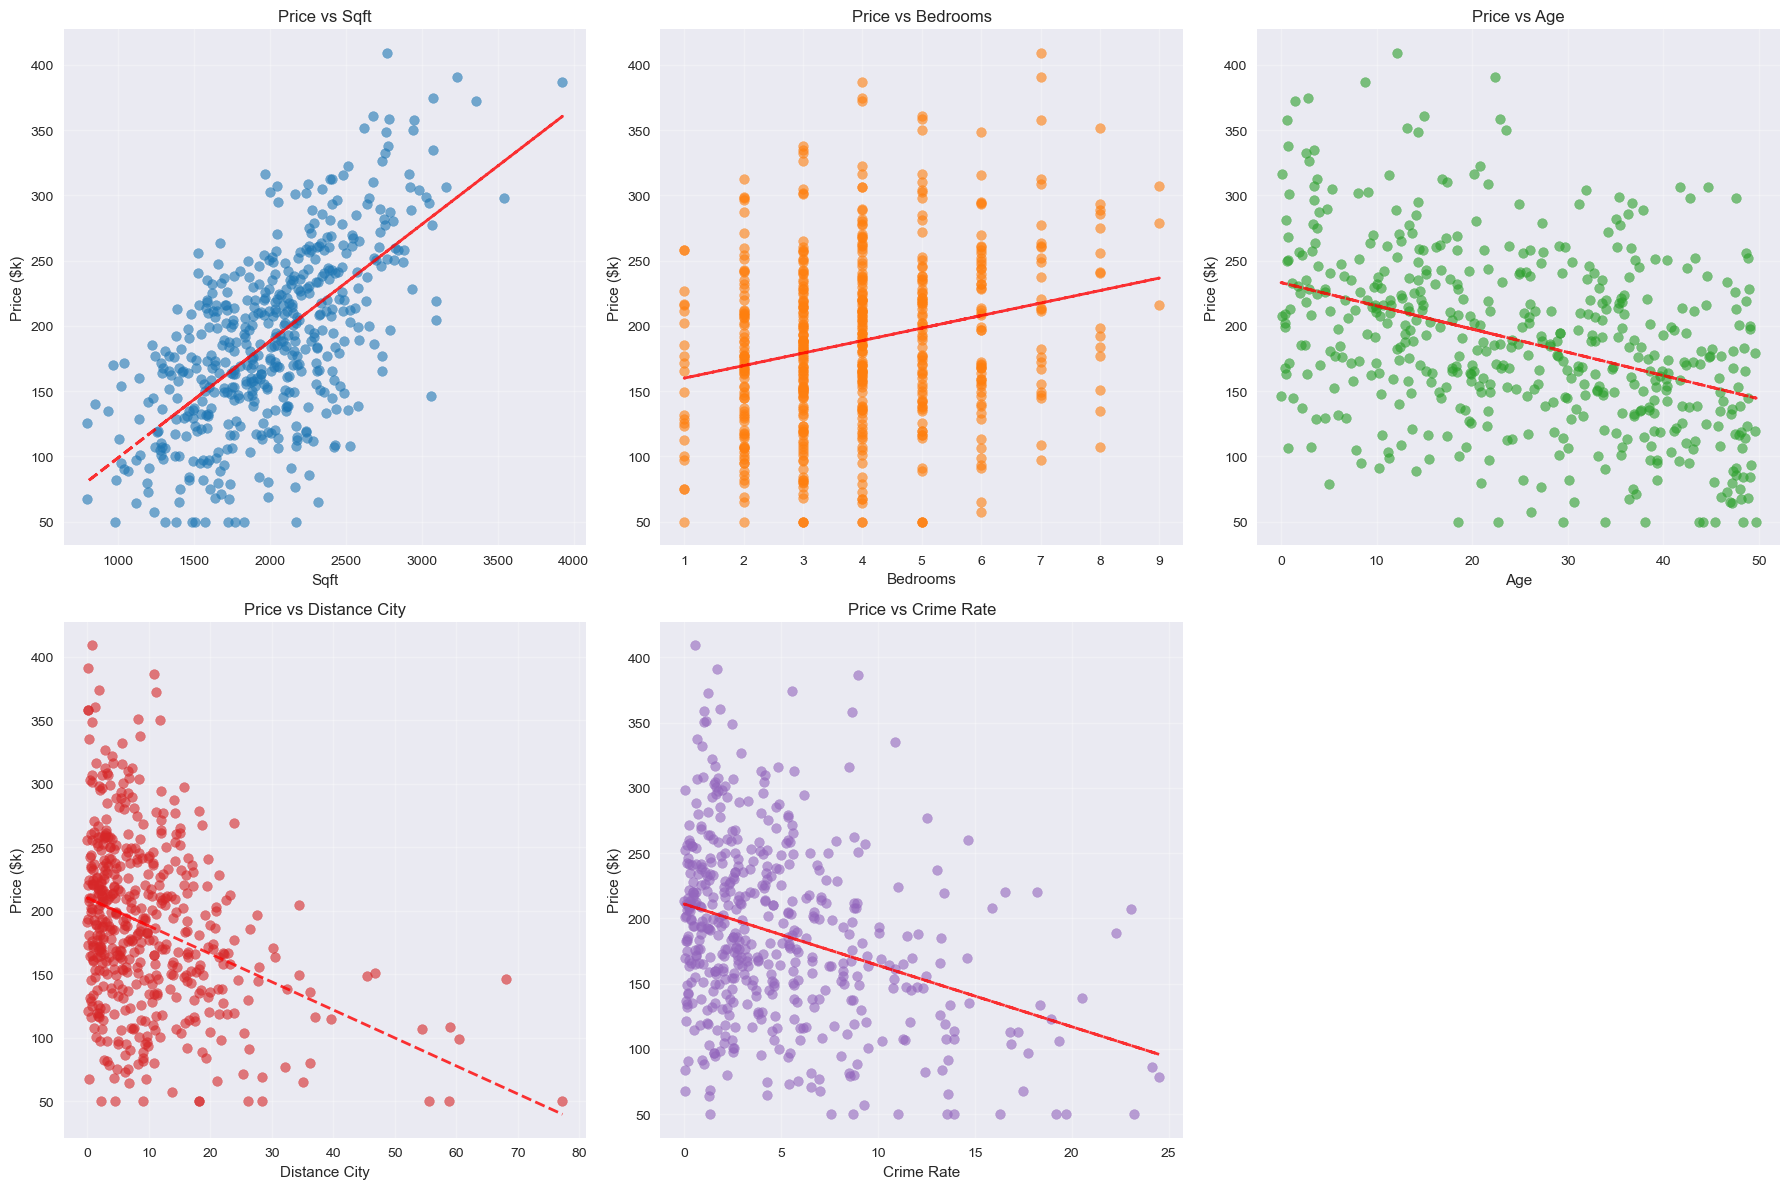

In [20]:
# Visualize relationships between features and price
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
features = ['sqft', 'bedrooms', 'age', 'distance_city', 'crime_rate']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    axes[row, col].scatter(housing_data[feature], housing_data['price'], 
                          alpha=0.6, color=plt.cm.tab10(i))
    axes[row, col].set_xlabel(feature.replace('_', ' ').title())
    axes[row, col].set_ylabel('Price ($k)')
    axes[row, col].set_title(f'Price vs {feature.replace("_", " ").title()}')
    axes[row, col].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(housing_data[feature], housing_data['price'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(housing_data[feature], p(housing_data[feature]), 
                       "r--", alpha=0.8, linewidth=2)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

In [22]:
# Prepare data for modeling
X_features = ['sqft', 'bedrooms', 'age', 'distance_city', 'crime_rate']
X_housing = housing_data[X_features]
y_housing = housing_data['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 400 samples
Testing set: 100 samples


In [24]:
# Train the multiple linear regression model
housing_model = LinearRegression()
housing_model.fit(X_train, y_train)

# Make predictions
y_train_pred = housing_model.predict(X_train)
y_test_pred = housing_model.predict(X_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Multiple Linear Regression Results:")
print("="*40)
print(f"Training R²:  {train_r2:.3f}")
print(f"Testing R²:   {test_r2:.3f}")
print(f"Training RMSE: ${train_rmse:.1f}k")
print(f"Testing RMSE:  ${test_rmse:.1f}k")

print(f"\nIntercept: ${housing_model.intercept_:.1f}k")

Multiple Linear Regression Results:
Training R²:  0.894
Testing R²:   0.914
Training RMSE: $22.0k
Testing RMSE:  $20.7k

Intercept: $49.2k


Feature Importance (by coefficient magnitude):
         Feature  Coefficient  Abs_Coefficient
1       bedrooms     9.512378         9.512378
4     crime_rate    -4.750175         4.750175
3  distance_city    -2.522502         2.522502
2            age    -1.932670         1.932670
0           sqft     0.098506         0.098506


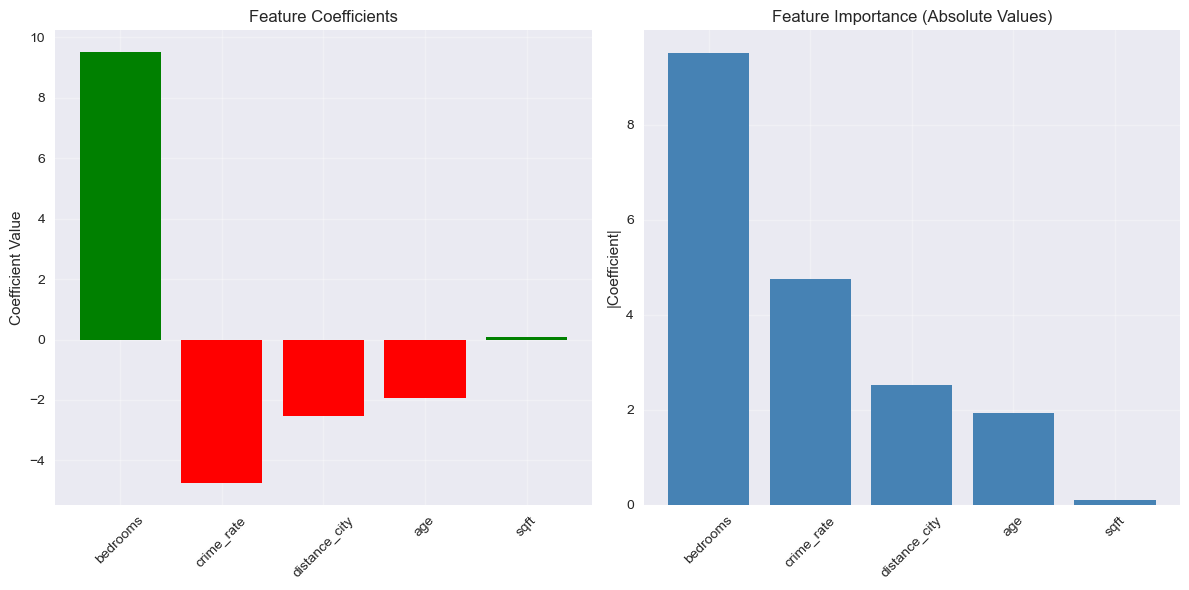

In [26]:
# Analyze feature importance
coefficients_df = pd.DataFrame({
    'Feature': X_features,
    'Coefficient': housing_model.coef_,
    'Abs_Coefficient': np.abs(housing_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (by coefficient magnitude):")
print(coefficients_df)

# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'], 
               color=['green' if x > 0 else 'red' for x in coefficients_df['Coefficient']])
plt.title('Feature Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(coefficients_df['Feature'], coefficients_df['Abs_Coefficient'], 
        color='steelblue')
plt.title('Feature Importance (Absolute Values)')
plt.ylabel('|Coefficient|')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpreting the Coefficients:

**Positive coefficients** = feature increases price

**Negative coefficients** = feature decreases price

**Larger absolute values** = more important features


## 4. Understanding Gradient Descent

Before we implement gradient descent, let's understand **why** we need it and **how** it works.

### The Problem:
Linear regression finds the best coefficients by minimizing the **Mean Squared Error (MSE)**:

**MSE = (1/n) × Σ(actual - predicted)²**

For simple problems, we can solve this mathematically. But for complex models, we need an iterative approach.

### The Solution: Gradient Descent
Think of gradient descent like finding the bottom of a valley while blindfolded:
1. **Start** at a random point
2. **Feel** the slope (gradient) 
3. **Step** downhill
4. **Repeat** until you reach the bottom

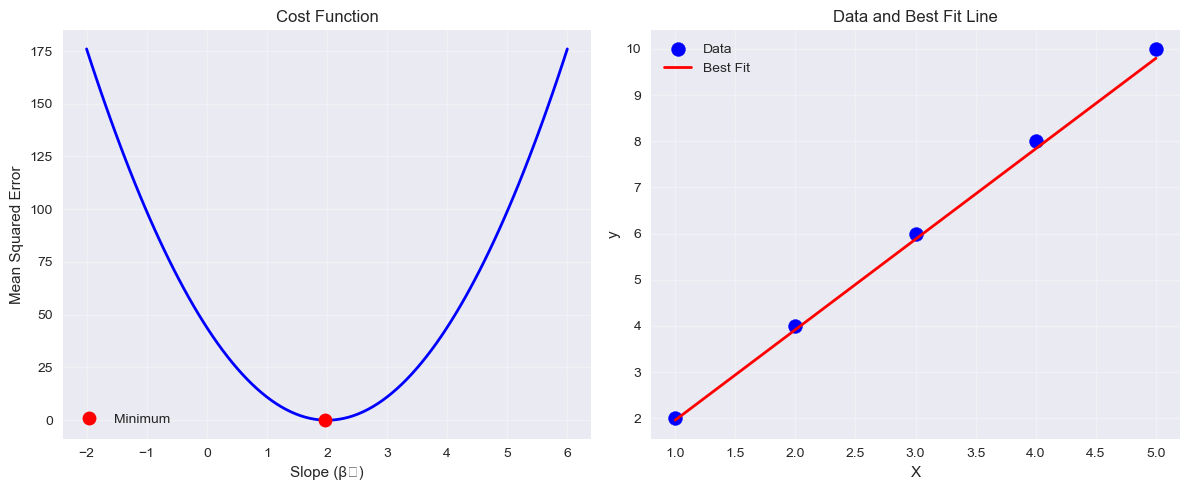

Optimal slope: 1.96
Minimum cost: 0.02


In [33]:
# Let's visualize what gradient descent is trying to minimize
def plot_cost_function():
    """Visualize the cost function for simple linear regression"""
    
    # Use a simple 1D example
    X_simple_gd = np.array([[1], [2], [3], [4], [5]])
    y_simple_gd = np.array([2, 4, 6, 8, 10])
    
    # Try different slopes (coefficients)
    slopes = np.linspace(-2, 6, 100)
    costs = []
    
    for slope in slopes:
        predictions = slope * X_simple_gd.flatten()
        mse = np.mean((y_simple_gd - predictions) ** 2)
        costs.append(mse)
    
    plt.figure(figsize=(12, 5))
    
    # Plot cost function
    plt.subplot(1, 2, 1)
    plt.plot(slopes, costs, 'b-', linewidth=2)
    plt.xlabel('Slope (β₁)')
    plt.ylabel('Mean Squared Error')
    plt.title('Cost Function')
    plt.grid(True, alpha=0.3)
    
    # Mark the minimum
    min_idx = np.argmin(costs)
    plt.plot(slopes[min_idx], costs[min_idx], 'ro', markersize=10, label='Minimum')
    plt.legend()
    
    # Show the data and best fit
    plt.subplot(1, 2, 2)
    plt.scatter(X_simple_gd, y_simple_gd, color='blue', s=100, label='Data')
    plt.plot(X_simple_gd, slopes[min_idx] * X_simple_gd.flatten(), 'r-', linewidth=2, label='Best Fit')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data and Best Fit Line')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Optimal slope: {slopes[min_idx]:.2f}")
    print(f"Minimum cost: {costs[min_idx]:.2f}")

plot_cost_function()


## 5. Implementing Gradient Descent from Scratch

Now let's implement gradient descent step by step to really understand how it works.


In [36]:
class LinearRegressionGD:
    """
    Linear Regression using Gradient Descent
    Built from scratch for educational purposes
    """
    
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.costs = []  # Track cost over iterations
        
    def fit(self, X, y):
        """Train the model using gradient descent"""
        
        # Add intercept term (column of ones)
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
        
        # Initialize weights randomly
        self.weights = np.random.normal(0, 0.01, X_with_intercept.shape[1])
        
        # Gradient descent loop
        for i in range(self.max_iterations):
            # Forward pass: make predictions
            predictions = X_with_intercept @ self.weights
            
            # Calculate cost (MSE)
            cost = np.mean((y - predictions) ** 2)
            self.costs.append(cost)
            
            # Calculate gradients
            gradients = -2 * X_with_intercept.T @ (y - predictions) / len(y)
            
            # Update weights
            new_weights = self.weights - self.learning_rate * gradients
            
            # Check for convergence
            if np.sum(np.abs(new_weights - self.weights)) < self.tolerance:
                print(f"Converged after {i+1} iterations")
                break
                
            self.weights = new_weights
            
        self.intercept_ = self.weights[0]
        self.coef_ = self.weights[1:]
        
    def predict(self, X):
        """Make predictions"""
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
        return X_with_intercept @ self.weights

# Test our implementation
print("Testing our Gradient Descent implementation:")
print("=" * 50)

# Use the simple dataset
gd_model = LinearRegressionGD(learning_rate=0.01, max_iterations=1000)
gd_model.fit(X_simple, y_simple)

# Compare with sklearn
sklearn_model = LinearRegression()
sklearn_model.fit(X_simple, y_simple)

print(f"Our implementation - Intercept: {gd_model.intercept_:.3f}, Coef: {gd_model.coef_[0]:.3f}")
print(f"Sklearn - Intercept: {sklearn_model.intercept_:.3f}, Coef: {sklearn_model.coef_[0]:.3f}")

Testing our Gradient Descent implementation:
Our implementation - Intercept: 93.228, Coef: 52.414
Sklearn - Intercept: 102.210, Coef: 49.080


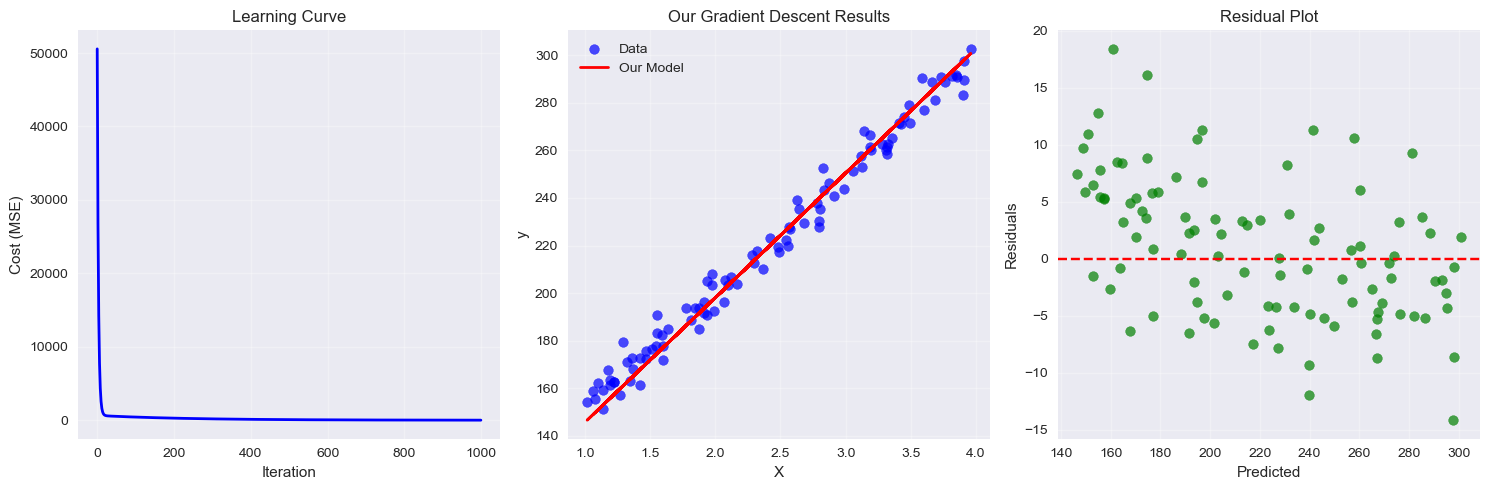

Final cost: 38.7362
R² score: 0.9799


In [38]:
# Visualize the learning process
plt.figure(figsize=(15, 5))

# Plot cost over iterations
plt.subplot(1, 3, 1)
plt.plot(gd_model.costs, 'b-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curve')
plt.grid(True, alpha=0.3)

# Plot predictions
plt.subplot(1, 3, 2)
gd_predictions = gd_model.predict(X_simple)
plt.scatter(X_simple, y_simple, alpha=0.7, color='blue', label='Data')
plt.plot(X_simple, gd_predictions, 'r-', linewidth=2, label='Our Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Our Gradient Descent Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare residuals
plt.subplot(1, 3, 3)
residuals_gd = y_simple - gd_predictions
plt.scatter(gd_predictions, residuals_gd, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

final_cost = gd_model.costs[-1]
print(f"Final cost: {final_cost:.4f}")
print(f"R² score: {r2_score(y_simple, gd_predictions):.4f}")

### The Effect of Learning Rate

The learning rate controls how big steps we take. Let's see what happens with different values:

Converged after 687 iterations


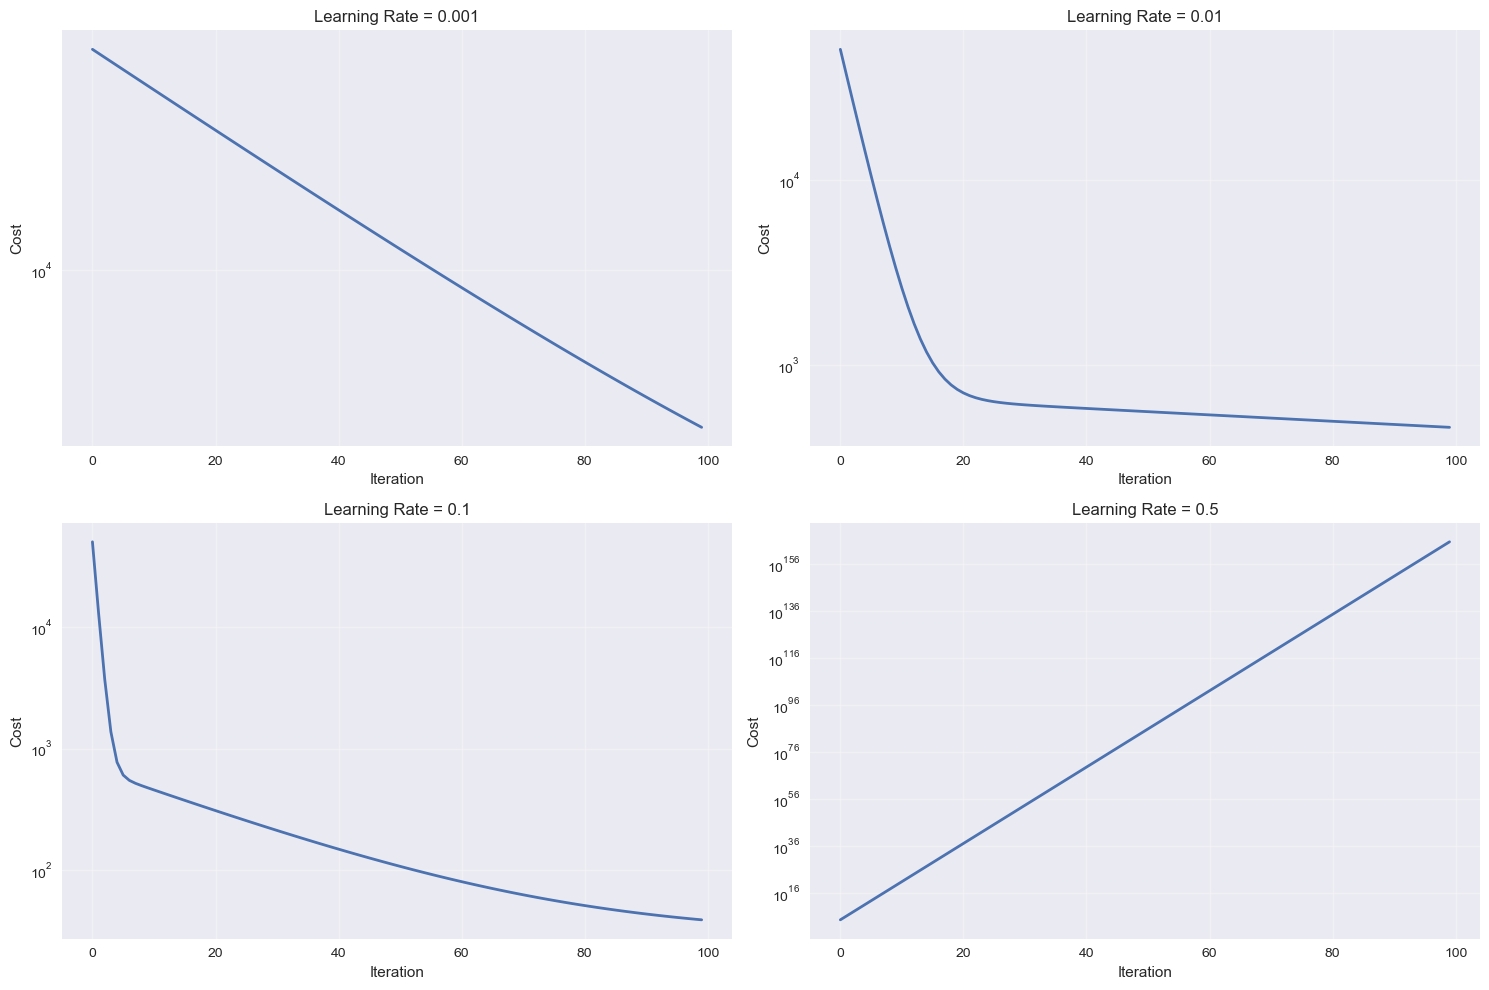

Learning Rate Effects:
• Too small: Slow convergence
• Too large: May overshoot or diverge
• Just right: Fast, stable convergence


In [41]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
plt.figure(figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    model = LinearRegressionGD(learning_rate=lr, max_iterations=1000)
    model.fit(X_simple, y_simple)
    
    plt.subplot(2, 2, i+1)
    plt.plot(model.costs[:100], linewidth=2)  # Plot first 100 iterations
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Log scale to see details

plt.tight_layout()
plt.show()

print("Learning Rate Effects:")
print("• Too small: Slow convergence")
print("• Too large: May overshoot or diverge") 
print("• Just right: Fast, stable convergence")

## 6. Logistic Regression

Now let's move from predicting continuous values (regression) to predicting categories (classification).

### The Key Difference:
Instead of predicting house prices ($100k, $200k, etc.), we predict probabilities (0.1, 0.8, etc.) and then classify.

### The Magic: Sigmoid Function
**σ(z) = 1 / (1 + e^(-z))**

This function squashes any real number into the range [0, 1], perfect for probabilities!

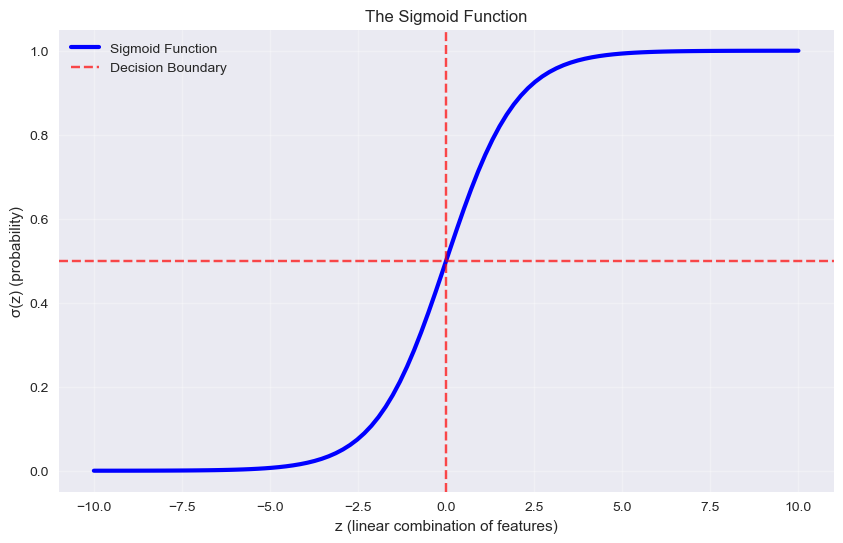

Key Points about Sigmoid:
• Input: Any real number
• Output: Always between 0 and 1
• Decision boundary: 0.5 (when z = 0)
• S-shaped curve: smooth transition


In [44]:
# Visualize the sigmoid function
def sigmoid(z):
    """The sigmoid function"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to prevent overflow

z = np.linspace(-10, 10, 100)
sig_z = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, sig_z, 'b-', linewidth=3, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Boundary')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('z (linear combination of features)')
plt.ylabel('σ(z) (probability)')
plt.title('The Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Key Points about Sigmoid:")
print("• Input: Any real number")
print("• Output: Always between 0 and 1")
print("• Decision boundary: 0.5 (when z = 0)")
print("• S-shaped curve: smooth transition")

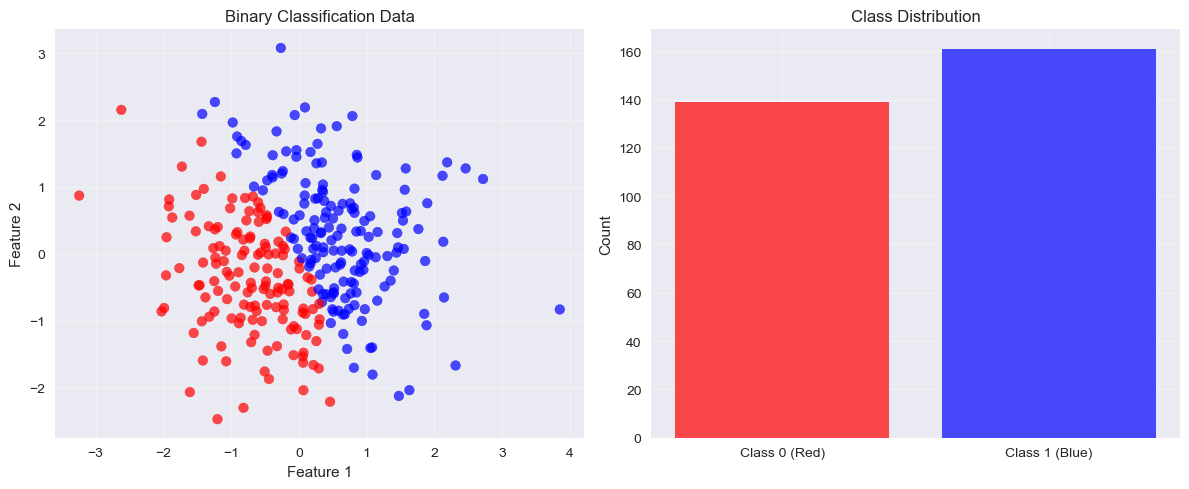

Total samples: 300
Class 0: 139 samples
Class 1: 161 samples


In [46]:
# Create a binary classification dataset
def create_classification_data(n_samples=300):
    """Create synthetic data for binary classification"""
    np.random.seed(42)
    
    # Generate features
    X1 = np.random.normal(0, 1, n_samples)
    X2 = np.random.normal(0, 1, n_samples)
    
    # Create non-linear decision boundary
    y_prob = sigmoid(1.5 * X1 + 0.8 * X2 - 0.3 * X1 * X2)
    y = (y_prob > 0.5).astype(int)
    
    return np.column_stack([X1, X2]), y

# Generate data
X_class, y_class = create_classification_data(300)

# Visualize the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['red' if label == 0 else 'blue' for label in y_class]
plt.scatter(X_class[:, 0], X_class[:, 1], c=colors, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.grid(True, alpha=0.3)

# Class distribution
plt.subplot(1, 2, 2)
unique, counts = np.unique(y_class, return_counts=True)
plt.bar(['Class 0 (Red)', 'Class 1 (Blue)'], counts, color=['red', 'blue'], alpha=0.7)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total samples: {len(y_class)}")
print(f"Class 0: {sum(y_class == 0)} samples")
print(f"Class 1: {sum(y_class == 1)} samples")

In [48]:
# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Train logistic regression
log_model = LogisticRegression()
log_model.fit(X_train_class, y_train_class)

# Make predictions
y_train_pred_class = log_model.predict(X_train_class)
y_test_pred_class = log_model.predict(X_test_class)

# Get prediction probabilities
y_train_proba = log_model.predict_proba(X_train_class)[:, 1]
y_test_proba = log_model.predict_proba(X_test_class)[:, 1]

# Evaluate performance
train_acc = accuracy_score(y_train_class, y_train_pred_class)
test_acc = accuracy_score(y_test_class, y_test_pred_class)

print("Logistic Regression Results:")
print("=" * 30)
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy:  {test_acc:.3f}")
print(f"\nModel Coefficients:")
print(f"Feature 1: {log_model.coef_[0][0]:.3f}")
print(f"Feature 2: {log_model.coef_[0][1]:.3f}")
print(f"Intercept: {log_model.intercept_[0]:.3f}")

Logistic Regression Results:
Training Accuracy: 0.971
Testing Accuracy:  0.983

Model Coefficients:
Feature 1: 4.449
Feature 2: 2.400
Intercept: 0.606


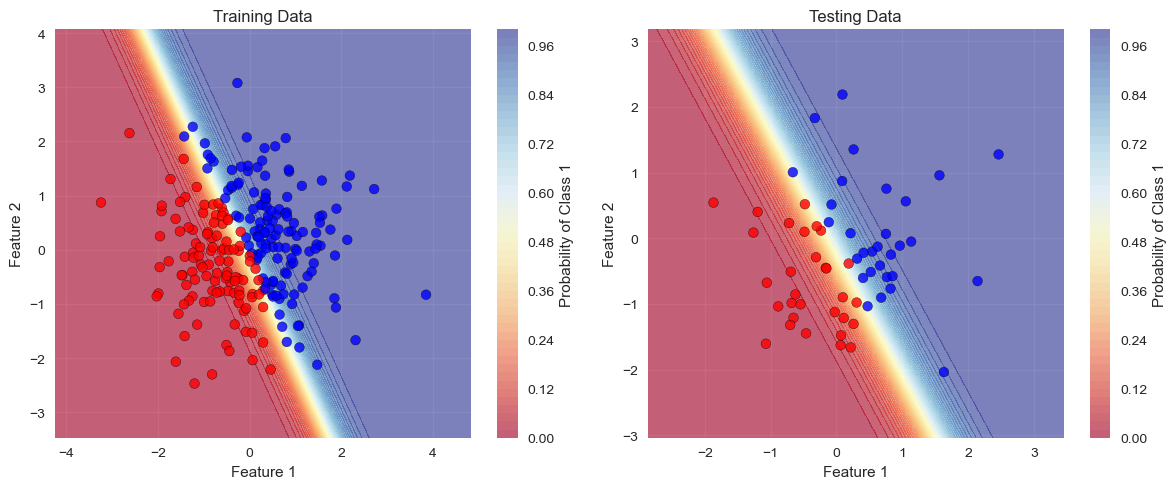

In [50]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    """Plot decision boundary for 2D classification"""
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict_proba(mesh_points)[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    plt.colorbar(label='Probability of Class 1')
    
    colors = ['red' if label == 0 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black', alpha=0.8)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_train_class, y_train_class, log_model, 'Training Data')

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_class, y_test_class, log_model, 'Testing Data')

plt.tight_layout()
plt.show()

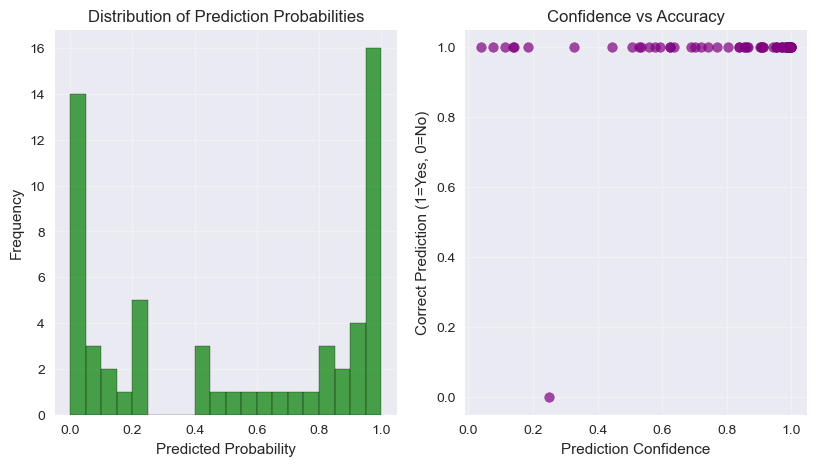

In [52]:
# Analyze prediction confidence
plt.figure(figsize=(15, 5))

# Histogram of prediction probabilities
plt.subplot(1, 3, 1)
plt.hist(y_test_proba, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Probabilities')
plt.grid(True, alpha=0.3)

# Confidence vs Accuracy
plt.subplot(1, 3, 2)
confidence = np.abs(y_test_proba - 0.5) * 2  # Distance from 0.5, scaled to [0,1]
correct = (y_test_pred_class == y_test_class)
plt.scatter(confidence, correct, alpha=0.7, color='purple')
plt.xlabel('Prediction Confidence')
plt.ylabel('Correct Prediction (1=Yes, 0=No)')
plt.title('Confidence vs Accuracy')
plt.grid(True, alpha=0.3)



## 7. Regularization Techniques

Sometimes our models become too complex and **overfit** to the training data. Regularization helps by adding a **penalty** for complexity.

### Types of Regularization:
- **Ridge (L2)**: Shrinks coefficients smoothly toward zero
- **Lasso (L1)**: Can make some coefficients exactly zero (feature selection)
- **Elastic Net**: Combines Ridge and Lasso

### Why Regularization Matters:
- **Prevents overfitting**: Model generalizes better to new data
- **Feature selection**: Lasso can automatically remove unimportant features
- **Handles multicollinearity**: When features are highly correlated

In [55]:
# Create a more complex dataset with noise and irrelevant features
def create_complex_data(n_samples=200, n_features=20, n_informative=5, noise=0.1):
    """Create dataset with many features, some irrelevant"""
    np.random.seed(42)
    
    # Create informative features
    X_informative = np.random.randn(n_samples, n_informative)
    
    # Create noise features
    X_noise = np.random.randn(n_samples, n_features - n_informative)
    
    # Combine features
    X = np.hstack([X_informative, X_noise])
    
    # Create target with only informative features
    true_coef = np.random.randn(n_informative) * 2
    y = X_informative @ true_coef + np.random.normal(0, noise, n_samples)
    
    return X, y, true_coef

# Generate complex dataset
X_complex, y_complex, true_coefficients = create_complex_data(200, 20, 5, 0.1)

print(f"Complex dataset created:")
print(f"• Total features: {X_complex.shape[1]}")
print(f"• Informative features: 5 (first 5)")
print(f"• Noise features: 15 (last 15)")
print(f"• True coefficients (first 5): {true_coefficients}")

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_complex, y_complex, test_size=0.3, random_state=42
)

# Scale the features (important for regularization!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

print(f"\nTraining set: {X_train_scaled.shape}")
print(f"Testing set: {X_test_scaled.shape}")

Complex dataset created:
• Total features: 20
• Informative features: 5 (first 5)
• Noise features: 15 (last 15)
• True coefficients (first 5): [-1.72698721 -0.06240698  0.03603374  0.94526069 -2.73371673]

Training set: (140, 20)
Testing set: (60, 20)


In [57]:
# Compare different regularization techniques
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Ridge (α=10.0)': Ridge(alpha=10.0),
    'Lasso (α=0.1)': Lasso(alpha=0.1),
    'Lasso (α=1.0)': Lasso(alpha=1.0)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train_reg)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train_reg, y_train_pred)
    test_r2 = r2_score(y_test_reg, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))
    
    # Count non-zero coefficients
    if hasattr(model, 'coef_'):
        n_nonzero = np.sum(np.abs(model.coef_) > 1e-5)
    else:
        n_nonzero = len(model.coef_)
    
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'n_features': n_nonzero,
        'coefficients': model.coef_ if hasattr(model, 'coef_') else None
    }

# Display results
print("Regularization Comparison:")
print("=" * 80)
print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'Train RMSE':<12} {'Test RMSE':<12} {'Features':<10}")
print("-" * 80)

for name, metrics in results.items():
    print(f"{name:<20} {metrics['train_r2']:<10.3f} {metrics['test_r2']:<10.3f} "
          f"{metrics['train_rmse']:<12.3f} {metrics['test_rmse']:<12.3f} {metrics['n_features']:<10}")

Regularization Comparison:
Model                Train R²   Test R²    Train RMSE   Test RMSE    Features  
--------------------------------------------------------------------------------
Linear Regression    0.999      0.999      0.092        0.107        20        
Ridge (α=1.0)        0.999      0.999      0.096        0.102        20        
Ridge (α=10.0)       0.994      0.994      0.256        0.253        20        
Lasso (α=0.1)        0.996      0.996      0.211        0.204        3         
Lasso (α=1.0)        0.757      0.750      1.690        1.587        3         


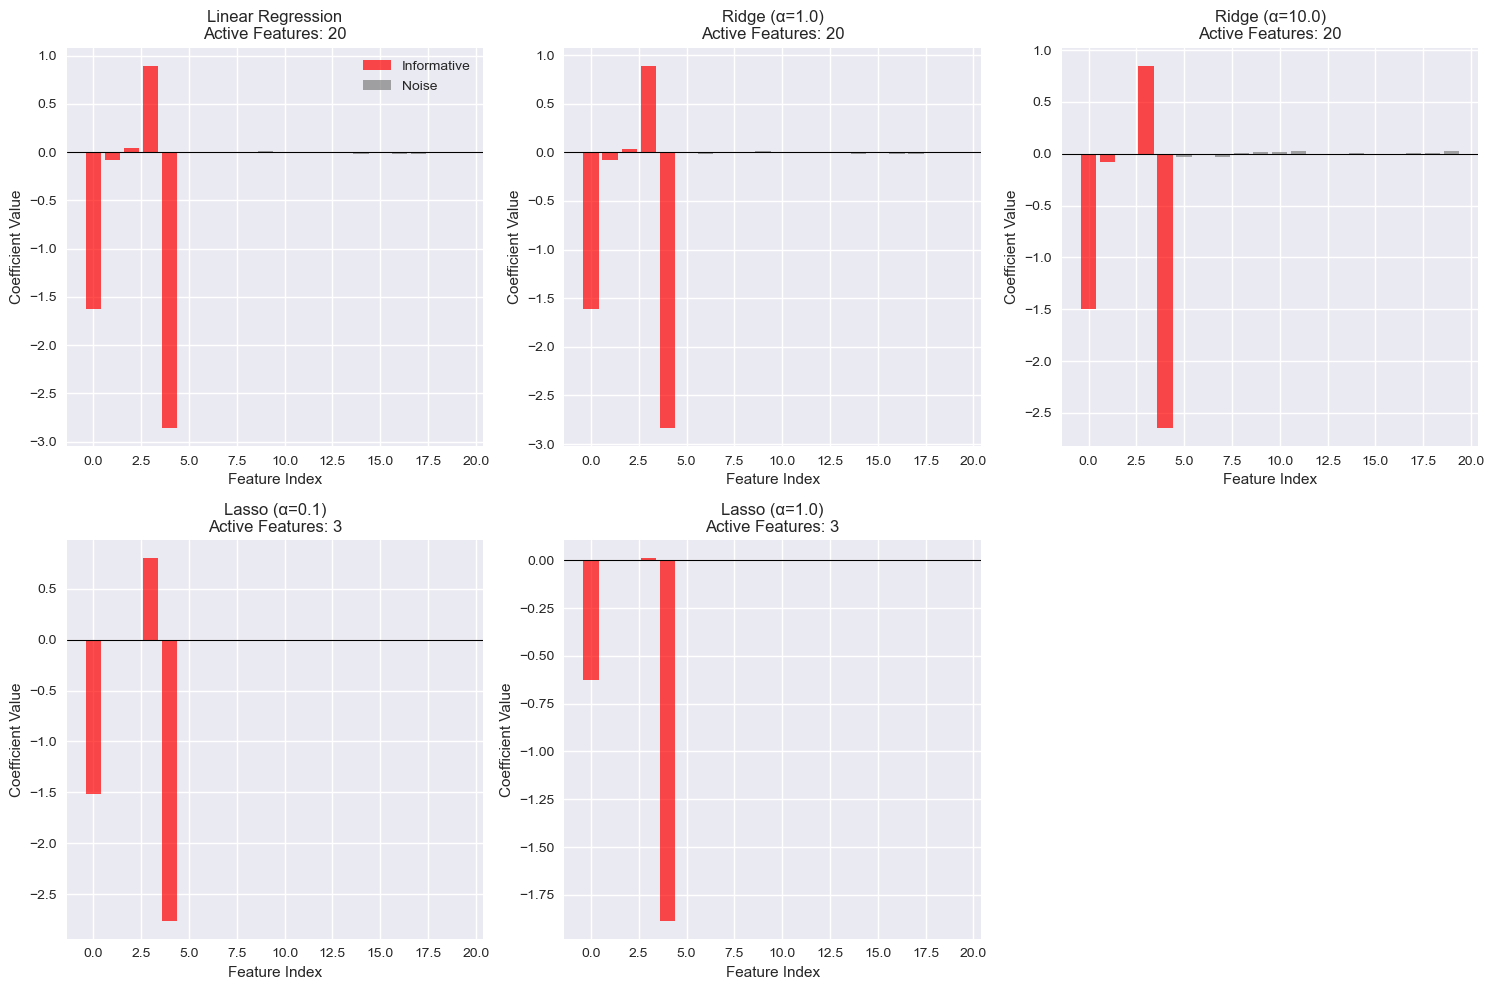


Key Observations:
• Linear Regression: Uses all features (may overfit)
• Ridge: Shrinks coefficients but keeps all features
• Lasso: Can eliminate features entirely (automatic feature selection)
• Higher α (alpha): More regularization, simpler models


In [59]:
# Visualize coefficients
plt.figure(figsize=(15, 10))

for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    if metrics['coefficients'] is not None:
        colors = ['red' if j < 5 else 'gray' for j in range(len(metrics['coefficients']))]
        bars = plt.bar(range(len(metrics['coefficients'])), metrics['coefficients'], 
                      color=colors, alpha=0.7)
        plt.title(f'{name}\nActive Features: {metrics["n_features"]}')
        plt.xlabel('Feature Index')
        plt.ylabel('Coefficient Value')
        plt.axhline(y=0, color='black', linewidth=0.8)
        
        # Add legend
        if i == 0:
            from matplotlib.patches import Patch
            legend_elements = [Patch(facecolor='red', alpha=0.7, label='Informative'),
                             Patch(facecolor='gray', alpha=0.7, label='Noise')]
            plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("• Linear Regression: Uses all features (may overfit)")
print("• Ridge: Shrinks coefficients but keeps all features")
print("• Lasso: Can eliminate features entirely (automatic feature selection)")
print("• Higher α (alpha): More regularization, simpler models")

Optimal Ridge α: 0.127
Optimal Lasso α: 0.006


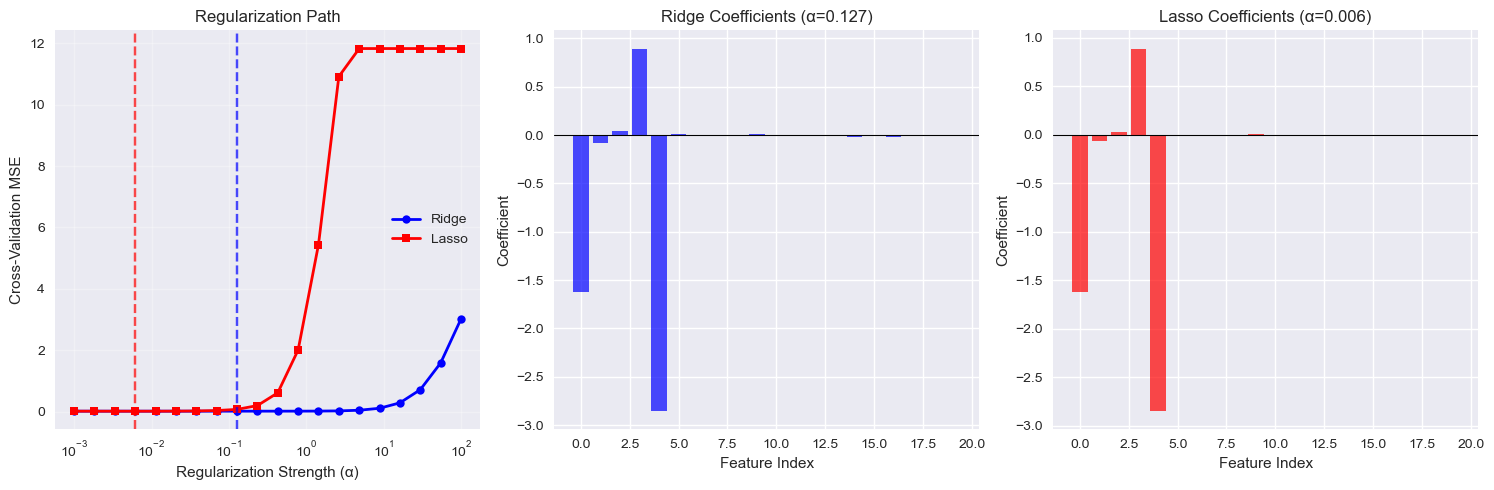


Final Model Performance:
Ridge Test R²: 0.999
Lasso Test R²: 0.999
Ridge features used: 20
Lasso features used: 10


In [61]:
# Find optimal regularization strength using cross-validation
from sklearn.model_selection import cross_val_score

# Test different alpha values for Ridge and Lasso
alphas = np.logspace(-3, 2, 20)  # From 0.001 to 100

ridge_scores = []
lasso_scores = []

for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha=alpha)
    ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train_reg, cv=5, 
                                     scoring='neg_mean_squared_error')
    ridge_scores.append(-ridge_cv_scores.mean())
    
    # Lasso regression  
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train_reg, cv=5, 
                                     scoring='neg_mean_squared_error')
    lasso_scores.append(-lasso_cv_scores.mean())

# Plot regularization path
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.semilogx(alphas, ridge_scores, 'bo-', label='Ridge', linewidth=2, markersize=6)
plt.semilogx(alphas, lasso_scores, 'rs-', label='Lasso', linewidth=2, markersize=6)
plt.xlabel('Regularization Strength (α)')
plt.ylabel('Cross-Validation MSE')
plt.title('Regularization Path')
plt.legend()
plt.grid(True, alpha=0.3)

# Find optimal alphas
optimal_ridge_alpha = alphas[np.argmin(ridge_scores)]
optimal_lasso_alpha = alphas[np.argmin(lasso_scores)]

plt.axvline(optimal_ridge_alpha, color='blue', linestyle='--', alpha=0.7)
plt.axvline(optimal_lasso_alpha, color='red', linestyle='--', alpha=0.7)

print(f"Optimal Ridge α: {optimal_ridge_alpha:.3f}")
print(f"Optimal Lasso α: {optimal_lasso_alpha:.3f}")

# Train final models with optimal parameters
final_ridge = Ridge(alpha=optimal_ridge_alpha)
final_lasso = Lasso(alpha=optimal_lasso_alpha)

final_ridge.fit(X_train_scaled, y_train_reg)
final_lasso.fit(X_train_scaled, y_train_reg)

# Compare coefficient paths
plt.subplot(1, 3, 2)
plt.bar(range(len(final_ridge.coef_)), final_ridge.coef_, alpha=0.7, color='blue')
plt.title(f'Ridge Coefficients (α={optimal_ridge_alpha:.3f})')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.axhline(y=0, color='black', linewidth=0.8)

plt.subplot(1, 3, 3)
colors = ['red' if abs(coef) > 1e-5 else 'lightgray' for coef in final_lasso.coef_]
plt.bar(range(len(final_lasso.coef_)), final_lasso.coef_, alpha=0.7, color=colors)
plt.title(f'Lasso Coefficients (α={optimal_lasso_alpha:.3f})')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

# Final performance
ridge_test_pred = final_ridge.predict(X_test_scaled)
lasso_test_pred = final_lasso.predict(X_test_scaled)

print(f"\nFinal Model Performance:")
print(f"Ridge Test R²: {r2_score(y_test_reg, ridge_test_pred):.3f}")
print(f"Lasso Test R²: {r2_score(y_test_reg, lasso_test_pred):.3f}")
print(f"Ridge features used: {len(final_ridge.coef_)}")
print(f"Lasso features used: {np.sum(np.abs(final_lasso.coef_) > 1e-5)}")

## 8. Real-World Applications

Let's apply everything we've learned to a realistic business scenario.

### Scenario: Predicting Customer Lifetime Value (CLV)
You work for an e-commerce company and need to predict how much each customer will spend over their lifetime.


In [64]:
# Create realistic customer data
def create_customer_data(n_customers=1000):
    """Create synthetic customer data for CLV prediction"""
    np.random.seed(42)
    
    # Customer demographics
    age = np.random.normal(35, 12, n_customers)
    income = np.random.lognormal(10, 0.5, n_customers)  # Log-normal for income
    
    # Behavioral features
    months_active = np.random.exponential(12, n_customers)
    avg_order_value = np.random.gamma(2, 25, n_customers)  # Gamma distribution
    order_frequency = np.random.poisson(2, n_customers) + 1  # Orders per month
    
    # Engagement features
    email_opens = np.random.beta(2, 5, n_customers)  # Open rate (0-1)
    support_tickets = np.random.poisson(0.5, n_customers)
    
    # Create realistic CLV based on features
    clv = (
        0.5 * age +
        0.0001 * income +
        10 * months_active +
        2 * avg_order_value +
        50 * order_frequency +
        200 * email_opens +
        -30 * support_tickets +
        np.random.normal(0, 50, n_customers)
    )
    
    # Ensure positive CLV
    clv = np.maximum(clv, 50)
    
    return pd.DataFrame({
        'age': age,
        'income': income,
        'months_active': months_active,
        'avg_order_value': avg_order_value,
        'order_frequency': order_frequency,
        'email_open_rate': email_opens,
        'support_tickets': support_tickets,
        'customer_lifetime_value': clv
    })

# Create the dataset
customer_data = create_customer_data(1000)

print("Customer Lifetime Value Dataset:")
print("=" * 40)
print(f"Dataset shape: {customer_data.shape}")
print("\nFirst few customers:")
print(customer_data.head())

print("\nDataset statistics:")
print(customer_data.describe().round(2))

Customer Lifetime Value Dataset:
Dataset shape: (1000, 8)

First few customers:
         age        income  months_active  avg_order_value  order_frequency  \
0  40.960570  44341.562353       6.272886        63.036606                4   
1  33.340828  34972.483357       0.819473         6.520669                2   
2  42.772262  22693.077136       5.147640        47.885982                4   
3  53.276358  15939.117886       1.411871       203.028909                4   
4  32.190160  31229.288168      19.817829        38.660893                2   

   email_open_rate  support_tickets  customer_lifetime_value  
0         0.549167                2               391.482833  
1         0.331902                0               219.502029  
2         0.049375                0               407.497606  
3         0.223067                1               618.177981  
4         0.160607                0               423.303120  

Dataset statistics:
           age     income  months_active  avg_

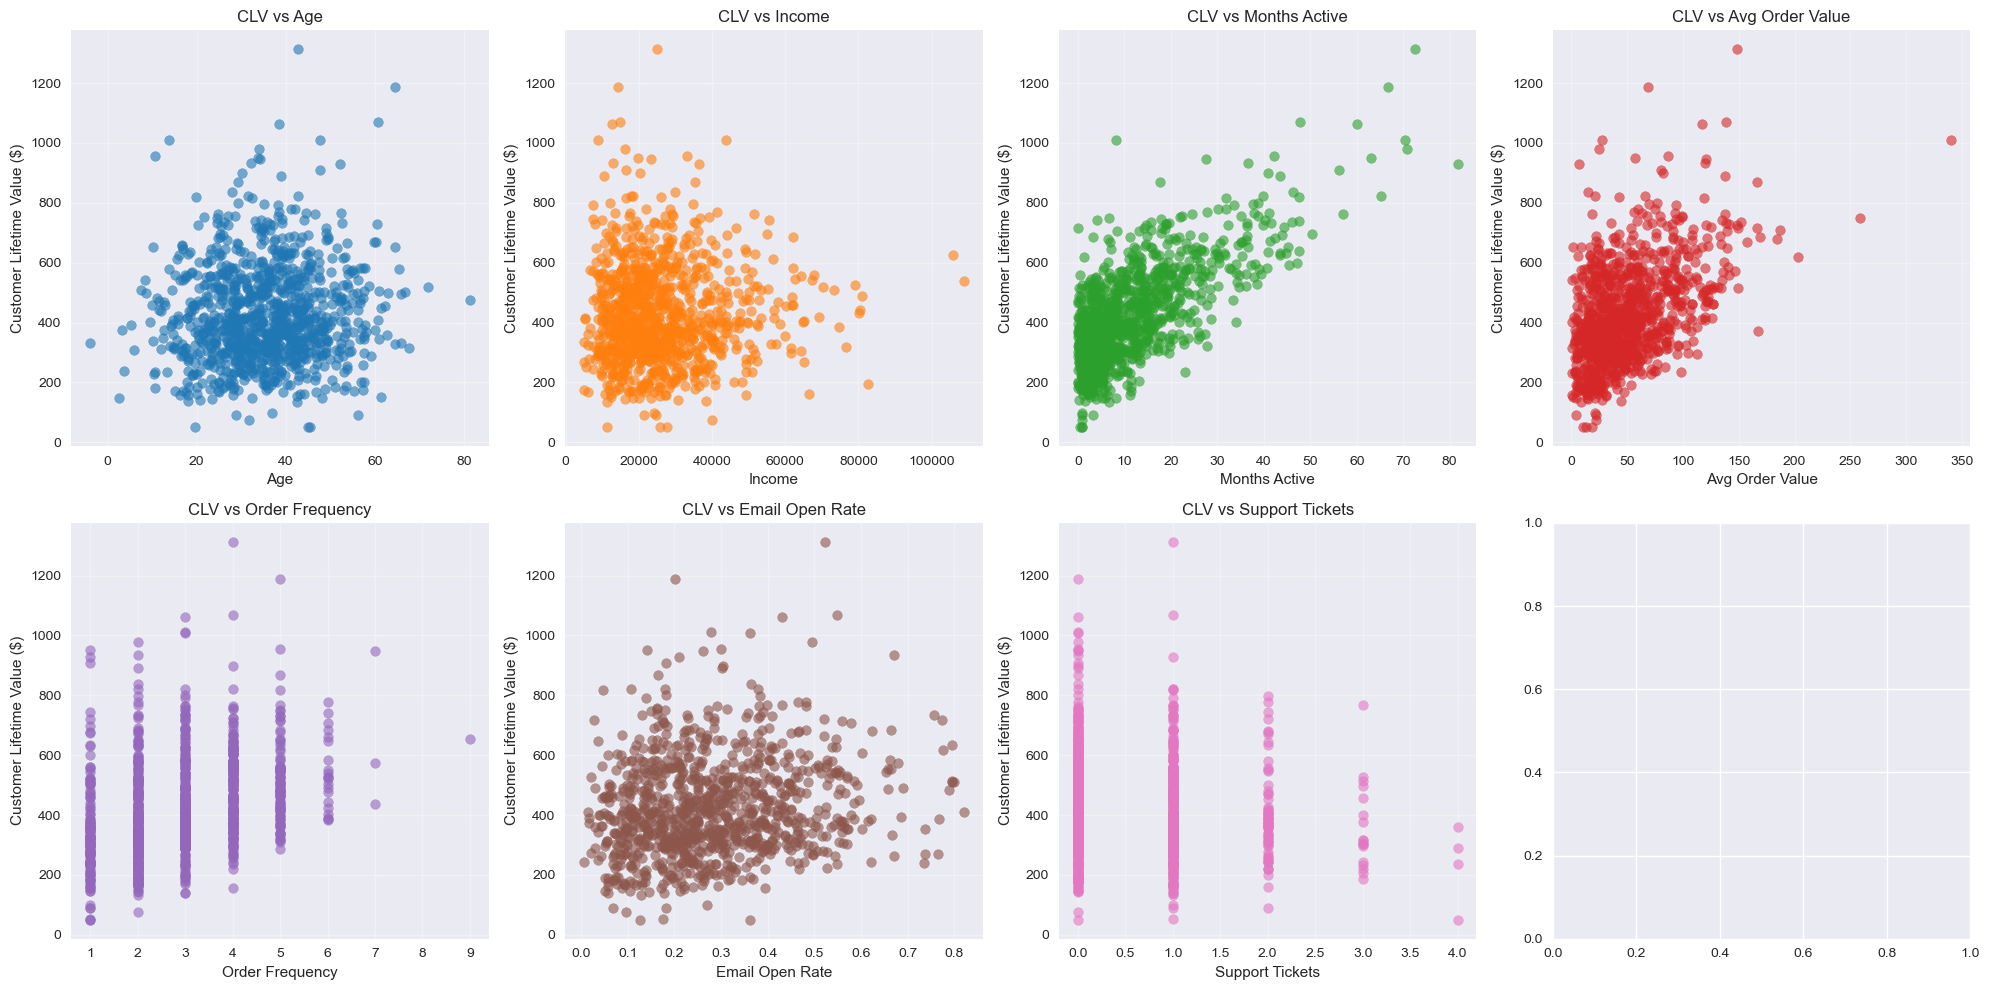

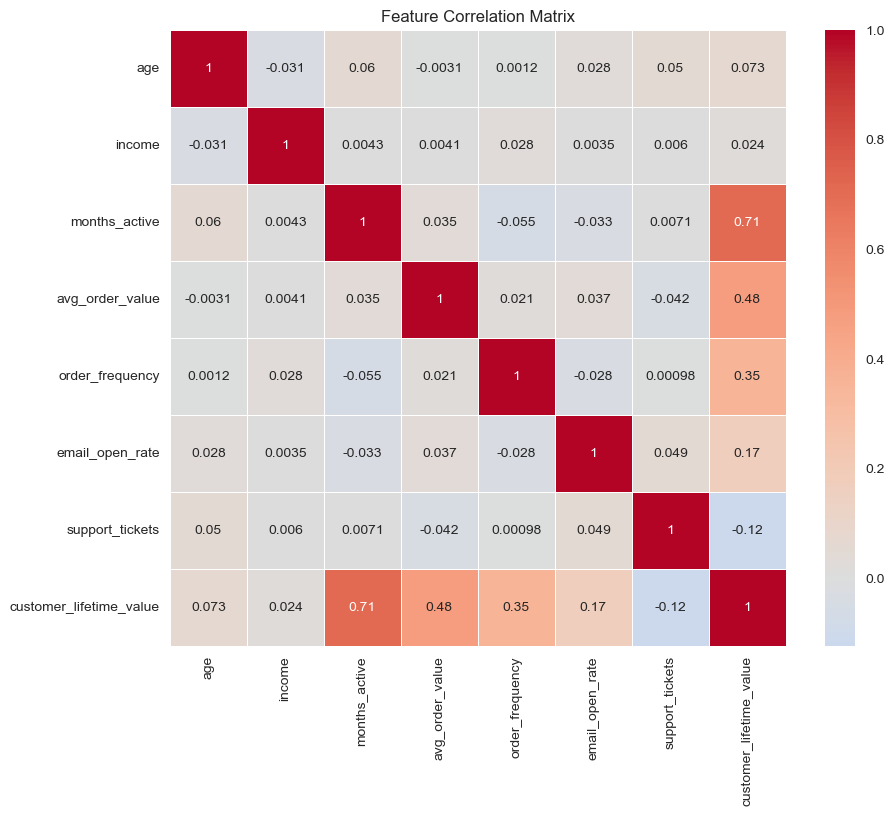

Correlation with CLV:
customer_lifetime_value    1.000000
months_active              0.710900
avg_order_value            0.479640
order_frequency            0.352313
email_open_rate            0.168318
age                        0.072596
income                     0.023640
support_tickets           -0.123930
Name: customer_lifetime_value, dtype: float64


In [66]:
# Explore the data
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
features = customer_data.columns[:-1]  # All except CLV

for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    axes[row, col].scatter(customer_data[feature], customer_data['customer_lifetime_value'], 
                          alpha=0.6, color=plt.cm.tab10(i))
    axes[row, col].set_xlabel(feature.replace('_', ' ').title())
    axes[row, col].set_ylabel('Customer Lifetime Value ($)')
    axes[row, col].set_title(f'CLV vs {feature.replace("_", " ").title()}')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = customer_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

print("Correlation with CLV:")
clv_correlations = correlation_matrix['customer_lifetime_value'].sort_values(ascending=False)
print(clv_correlations)

In [68]:
# Prepare data for modeling
feature_columns = [col for col in customer_data.columns if col != 'customer_lifetime_value']
X_customer = customer_data[feature_columns]
y_customer = customer_data['customer_lifetime_value']

# Split and scale data
X_train_cust, X_test_cust, y_train_cust, y_test_cust = train_test_split(
    X_customer, y_customer, test_size=0.2, random_state=42
)

scaler_customer = StandardScaler()
X_train_cust_scaled = scaler_customer.fit_transform(X_train_cust)
X_test_cust_scaled = scaler_customer.transform(X_test_cust)

# Compare multiple approaches
customer_models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Ridge (α=10.0)': Ridge(alpha=10.0),
    'Lasso (α=0.1)': Lasso(alpha=0.1),
    'Lasso (α=1.0)': Lasso(alpha=1.0),
}

customer_results = {}

print("Customer Lifetime Value Prediction Results:")
print("=" * 60)
print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'Test RMSE':<12} {'Features':<10}")
print("-" * 60)

for name, model in customer_models.items():
    # Train
    model.fit(X_train_cust_scaled, y_train_cust)
    
    # Predict
    y_train_pred = model.predict(X_train_cust_scaled)
    y_test_pred = model.predict(X_test_cust_scaled)
    
    # Evaluate
    train_r2 = r2_score(y_train_cust, y_train_pred)
    test_r2 = r2_score(y_test_cust, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test_cust, y_test_pred))
    
    # Feature count
    if hasattr(model, 'coef_'):
        n_features = np.sum(np.abs(model.coef_) > 1e-5)
        coefficients = model.coef_
    else:
        n_features = len(X_customer.columns)
        coefficients = None
    
    customer_results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'n_features': n_features,
        'coefficients': coefficients,
        'predictions': y_test_pred
    }
    
    print(f"{name:<20} {train_r2:<10.3f} {test_r2:<10.3f} {test_rmse:<12.1f} {n_features:<10}")

Customer Lifetime Value Prediction Results:
Model                Train R²   Test R²    Test RMSE    Features  
------------------------------------------------------------
Linear Regression    0.910      0.900      53.6         7         
Ridge (α=1.0)        0.910      0.900      53.6         7         
Ridge (α=10.0)       0.910      0.900      53.6         7         
Lasso (α=0.1)        0.910      0.900      53.6         7         
Lasso (α=1.0)        0.910      0.900      53.5         7         



Best Model: Lasso (α=1.0)
Test R²: 0.900
Test RMSE: $54

Feature Importance (Top 5):
• months_active: increases CLV by $116.6 per unit
• avg_order_value: increases CLV by $73.1 per unit
• order_frequency: increases CLV by $62.5 per unit
• email_open_rate: increases CLV by $31.7 per unit
• support_tickets: decreases CLV by $19.4 per unit


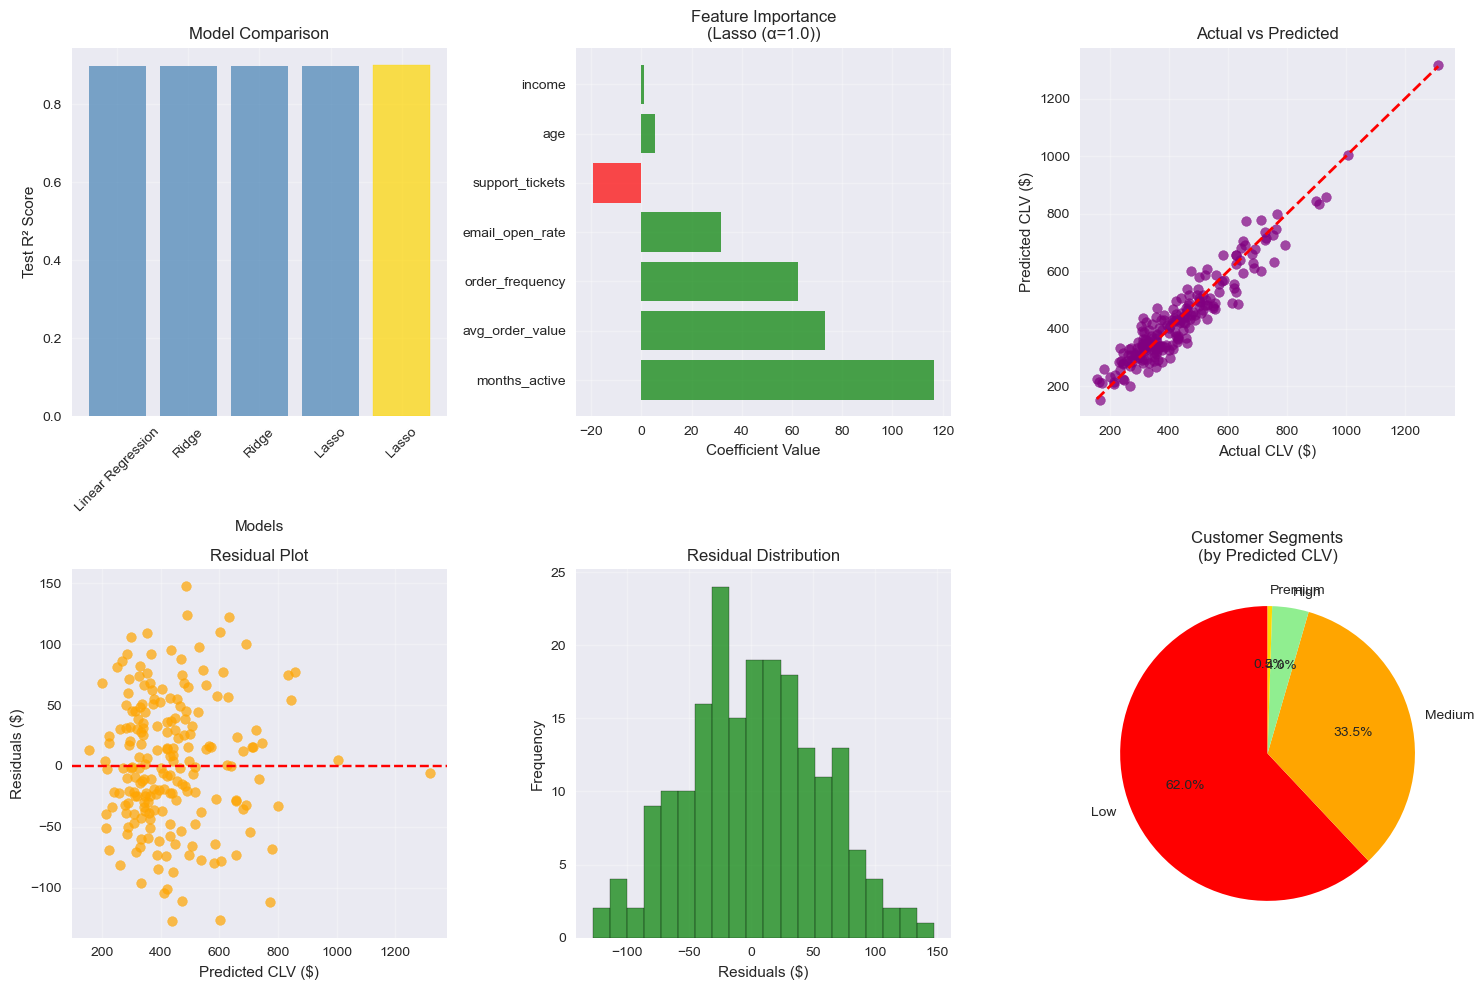

In [70]:
# Choose the best model and analyze it
best_model_name = max(customer_results.keys(), 
                     key=lambda x: customer_results[x]['test_r2'])
best_model = customer_results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Test R²: {best_model['test_r2']:.3f}")
print(f"Test RMSE: ${best_model['test_rmse']:.0f}")

# Feature importance analysis
if best_model['coefficients'] is not None:
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': best_model['coefficients'],
        'Abs_Coefficient': np.abs(best_model['coefficients'])
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print(f"\nFeature Importance (Top 5):")
    print("=" * 40)
    for _, row in feature_importance.head().iterrows():
        direction = "increases" if row['Coefficient'] > 0 else "decreases"
        print(f"• {row['Feature']}: {direction} CLV by ${abs(row['Coefficient']):.1f} per unit")

# Visualize results
plt.figure(figsize=(15, 10))

# Model comparison
plt.subplot(2, 3, 1)
model_names = list(customer_results.keys())
test_r2_scores = [customer_results[name]['test_r2'] for name in model_names]
bars = plt.bar(range(len(model_names)), test_r2_scores, color='steelblue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Test R² Score')
plt.title('Model Comparison')
plt.xticks(range(len(model_names)), [name.split('(')[0].strip() for name in model_names], rotation=45)
plt.grid(True, alpha=0.3)

# Highlight best model
best_idx = model_names.index(best_model_name)
bars[best_idx].set_color('gold')

# Feature importance
if best_model['coefficients'] is not None:
    plt.subplot(2, 3, 2)
    colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
    plt.barh(range(len(feature_importance)), feature_importance['Coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Importance\n({best_model_name})')
    plt.grid(True, alpha=0.3)

# Predictions vs Actual
plt.subplot(2, 3, 3)
plt.scatter(y_test_cust, best_model['predictions'], alpha=0.7, color='purple')
plt.plot([y_test_cust.min(), y_test_cust.max()], [y_test_cust.min(), y_test_cust.max()], 
         'r--', linewidth=2)
plt.xlabel('Actual CLV ($)')
plt.ylabel('Predicted CLV ($)')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

# Residuals
plt.subplot(2, 3, 4)
residuals = y_test_cust - best_model['predictions']
plt.scatter(best_model['predictions'], residuals, alpha=0.7, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted CLV ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Residual distribution
plt.subplot(2, 3, 5)
plt.hist(residuals, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(True, alpha=0.3)

# Business impact analysis
plt.subplot(2, 3, 6)
# Segment customers by predicted CLV
predictions = best_model['predictions']
segments = pd.cut(predictions, bins=4, labels=['Low', 'Medium', 'High', 'Premium'])
segment_counts = segments.value_counts()
colors = ['red', 'orange', 'lightgreen', 'gold']
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Customer Segments\n(by Predicted CLV)')

plt.tight_layout()
plt.show()

## Business Insights and Recommendations

Based on our Customer Lifetime Value analysis:


In [73]:
# Generate business insights
print("BUSINESS INSIGHTS FROM CLV MODEL:")
print("=" * 50)

# Customer segmentation analysis
predictions_df = pd.DataFrame({
    'actual_clv': y_test_cust,
    'predicted_clv': best_model['predictions'],
    'customer_segment': pd.cut(best_model['predictions'], 
                              bins=4, labels=['Low', 'Medium', 'High', 'Premium'])
})

segment_analysis = predictions_df.groupby('customer_segment').agg({
    'predicted_clv': ['count', 'mean', 'std'],
    'actual_clv': 'mean'
}).round(2)

print("\n1. CUSTOMER SEGMENTATION:")
print(segment_analysis)

# Feature insights
if best_model['coefficients'] is not None:
    print(f"\n2. KEY DRIVERS OF CLV:")
    top_features = feature_importance.head(3)
    for _, row in top_features.iterrows():
        impact = "positively" if row['Coefficient'] > 0 else "negatively"
        print(f"   • {row['Feature'].replace('_', ' ').title()}: "
              f"affects CLV {impact} (${abs(row['Coefficient']):.1f} per unit)")

# Model performance insights
print(f"\n3. MODEL PERFORMANCE:")
print(f"   • Explains {best_model['test_r2']*100:.1f}% of CLV variation")
print(f"   • Average prediction error: ${best_model['test_rmse']:.0f}")
print(f"   • Model complexity: Uses {best_model['n_features']} features")

# Business recommendations
print(f"\n4. BUSINESS RECOMMENDATIONS:")
print(f"   • Focus marketing budget on 'High' and 'Premium' segments")
print(f"   • Improve email engagement to increase CLV")
print(f"   • Monitor and reduce support ticket volume")
print(f"   • Encourage higher order frequency through loyalty programs")
print(f"   • Use model to identify at-risk customers (low predicted CLV)")

# Calculate potential business impact
high_value_customers = np.sum(best_model['predictions'] > np.percentile(best_model['predictions'], 75))
total_customers_tested = len(best_model['predictions'])
high_value_percentage = (high_value_customers / total_customers_tested) * 100

avg_clv_high = np.mean(best_model['predictions'][best_model['predictions'] > np.percentile(best_model['predictions'], 75)])
avg_clv_overall = np.mean(best_model['predictions'])

print(f"\n5. BUSINESS IMPACT:")
print(f"   • {high_value_percentage:.1f}% of customers are high-value (top 25%)")
print(f"   • High-value customers worth ${avg_clv_high:.0f} vs ${avg_clv_overall:.0f} average")
print(f"   • Focus on top 25% could yield {(avg_clv_high/avg_clv_overall-1)*100:.0f}% higher ROI")

BUSINESS INSIGHTS FROM CLV MODEL:

1. CUSTOMER SEGMENTATION:
                 predicted_clv                 actual_clv
                         count     mean    std       mean
customer_segment                                         
Low                        124   339.72  64.32     339.16
Medium                      67   552.99  85.13     562.19
High                         8   829.64  80.30     831.71
Premium                      1  1318.71    NaN    1312.83

2. KEY DRIVERS OF CLV:
   • Months Active: affects CLV positively ($116.6 per unit)
   • Avg Order Value: affects CLV positively ($73.1 per unit)
   • Order Frequency: affects CLV positively ($62.5 per unit)

3. MODEL PERFORMANCE:
   • Explains 90.0% of CLV variation
   • Average prediction error: $54
   • Model complexity: Uses 7 features

4. BUSINESS RECOMMENDATIONS:
   • Focus marketing budget on 'High' and 'Premium' segments
   • Improve email engagement to increase CLV
   • Monitor and reduce support ticket volume
   • En

## Summary and Key Takeaways

### What We've Learned:

1. **Linear Models are Fundamental**: They provide interpretable, efficient solutions for many business problems

2. **Gradient Descent is Powerful**: Understanding how algorithms learn helps you troubleshoot and optimize

3. **Regularization Prevents Overfitting**: Ridge and Lasso help create models that generalize better

4. **Feature Engineering Matters**: The right features are often more important than complex algorithms

5. **Business Context is Critical**: Always interpret your models in the context of real business decisions

### Best Practices:
- **Always visualize your data first**
- **Split your data properly (train/validation/test)**
- **Scale features for regularized models**
- **Use cross-validation to select hyperparameters**
- **Validate model assumptions with residual plots**
- **Interpret coefficients in business terms**

### When to Use Each Technique:
- **Simple Linear Regression**: Single predictor, interpretability is key
- **Multiple Linear Regression**: Multiple predictors, linear relationships
- **Ridge Regression**: Many features, multicollinearity issues
- **Lasso Regression**: Feature selection needed, sparse solutions desired
- **Logistic Regression**: Binary classification problems


In [76]:
# Final demonstration: Quick model comparison function
def quick_model_comparison(X, y, test_size=0.2, random_state=42):
    """
    Quickly compare different linear models on your dataset
    """
    from sklearn.model_selection import cross_val_score
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Models to compare
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge (α=1.0)': Ridge(alpha=1.0),
        'Lasso (α=0.1)': Lasso(alpha=0.1)
    }
    
    results = {}
    
    for name, model in models.items():
        # Fit model
        model.fit(X_train_scaled, y_train)
        
        # Cross-validation score
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, 
                                   scoring='r2')
        
        # Test performance
        test_pred = model.predict(X_test_scaled)
        test_r2 = r2_score(y_test, test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        results[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'test_r2': test_r2,
            'test_rmse': test_rmse
        }
    
    # Display results
    print("Quick Model Comparison:")
    print("=" * 60)
    print(f"{'Model':<20} {'CV R² (mean±std)':<20} {'Test R²':<10} {'Test RMSE':<10}")
    print("-" * 60)
    
    for name, metrics in results.items():
        cv_str = f"{metrics['cv_mean']:.3f}±{metrics['cv_std']:.3f}"
        print(f"{name:<20} {cv_str:<20} {metrics['test_r2']:<10.3f} {metrics['test_rmse']:<10.2f}")
    
    return results

# Test the function with our customer data
print("Testing Quick Comparison Function:")
comparison_results = quick_model_comparison(X_customer, y_customer)

print("\n" + "="*80)
print("CONGRATULATIONS! You've completed the Linear Models & Gradient Descent tutorial!")
print("="*80)

print("\nYou now understand:")
print("✓ How linear models work mathematically")
print("✓ The difference between regression and classification")
print("✓ How gradient descent optimizes model parameters")
print("✓ When and why to use regularization")
print("✓ How to interpret model coefficients for business insights")
print("✓ How to evaluate and compare different models")

print("\nNext steps for deeper learning:")
print("• Experiment with different regularization parameters")
print("• Try polynomial features for non-linear relationships")
print("• Learn about other loss functions (Huber, quantile regression)")
print("• Explore advanced topics like elastic net regularization")
print("• Apply these techniques to your own datasets!")

print("\nRemember: Linear models are often the best starting point for any ML project!")


Testing Quick Comparison Function:
Quick Model Comparison:
Model                CV R² (mean±std)     Test R²    Test RMSE 
------------------------------------------------------------
Linear Regression    0.907±0.010          0.900      53.64     
Ridge (α=1.0)        0.907±0.010          0.900      53.64     
Lasso (α=0.1)        0.907±0.010          0.900      53.63     

CONGRATULATIONS! You've completed the Linear Models & Gradient Descent tutorial!

You now understand:
✓ How linear models work mathematically
✓ The difference between regression and classification
✓ How gradient descent optimizes model parameters
✓ When and why to use regularization
✓ How to interpret model coefficients for business insights
✓ How to evaluate and compare different models

Next steps for deeper learning:
• Experiment with different regularization parameters
• Try polynomial features for non-linear relationships
• Learn about other loss functions (Huber, quantile regression)
• Explore advanced topics 

## Appendix: Mathematical Details

For students who want to dive deeper into the mathematics:

---

### A.1 Normal Equations for Linear Regression

**Closed-form solution (when possible):**
```
β = (X^T X)^(-1) X^T y
```

Where:
- β = coefficient vector
- X = feature matrix (with intercept column)
- y = target vector

---

### A.2 Gradient Descent Update Rules

**For Linear Regression:**
```
β = β - α * (2/n) * X^T * (Xβ - y)
```

**For Logistic Regression:**
```
β = β - α * (1/n) * X^T * (σ(Xβ) - y)
```

Where:
- α = learning rate
- n = number of samples
- σ = sigmoid function

---

### A.3 Regularization Penalties

**Ridge (L2) Penalty:**
```
Penalty = λ * Σ(βᵢ²)
```

**Lasso (L1) Penalty:**
```
Penalty = λ * Σ|βᵢ|
```

**Elastic Net:**
```
Penalty = λ₁ * Σ|βᵢ| + λ₂ * Σ(βᵢ²)
```

---

### A.4 Common Loss Functions

**Mean Squared Error (MSE):**
```
MSE = (1/n) * Σ(yᵢ - ŷᵢ)²
```

**Mean Absolute Error (MAE):**
```
MAE = (1/n) * Σ|yᵢ - ŷᵢ|
```

**Log-Likelihood (Logistic Regression):**
```
LL = Σ[yᵢ * log(pᵢ) + (1-yᵢ) * log(1-pᵢ)]
```
